In [2]:
# ! pip install unidecode

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> State & Refine QS</h1></div>

#### What is the most paying position in Berlin?

> #### _`QS:`_
>|Set Expectation | Collect Info | Match Results| 
>|----|----|----|
>|Machine Learning engineers with high Seniority level have a high salaries.|<ul><li>Filter the data to get positions in Berlin only</li><li>Get the average Salary For each position in senior level only and sort them</li><li>plot the average for each position in Berlin</li><li>look at the top 5 positions if they contain Machine Learning</li></ul>| |_`Matches`_ |
>|The juniors distribution for the average salaries may be different from the seniors and Middle as in IT Positions , some positions not commmon to need juniors such as Machine learning ,for example compared to frontend developer or software developer in general   |Same data collection but we look in junior seniority level |_`Matches`_ |
>|The heighiest Salary positions in senior level may be similier to middle level | Same data collection but we look in middle seniority level |_`Matches`_ |


In [3]:
from utils import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from E_Salary_Cities import *

In [13]:
df_2020,df_2019,df_2018=read()
rename_columns(df_2020,df_2019,df_2018)
df_2018['Position'].value_counts()
df_merged=merge([df_2020,df_2019,df_2018],common_columns=['Position','Salary','City','Seniority level'])

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> Explore Data</h1></div>

#### Analysis for each column

In [6]:
############################### CITY ANALYSIS #################################

-  `Expectations : 1. Berlin will have the biggest % as it is capital of Germany`

In [14]:
# Clean the columns 
# check nulls 
pos_nan = count_nan_values(df_merged,'Position')
city_nan = count_nan_values(df_merged,'City')
sal_nan = count_nan_values(df_merged,'Salary')
seniority_nan = count_nan_values(df_merged,'Seniority level')

In [15]:
# Remove nan values and check row col
df_cleaned=df_merged.dropna(inplace=False)

In [ ]:

df_cleaned=clean_positions(df_cleaned)


In [17]:
# Start cleaning the City column 
df_cleaned=clean_cities(df_cleaned,filter=11)


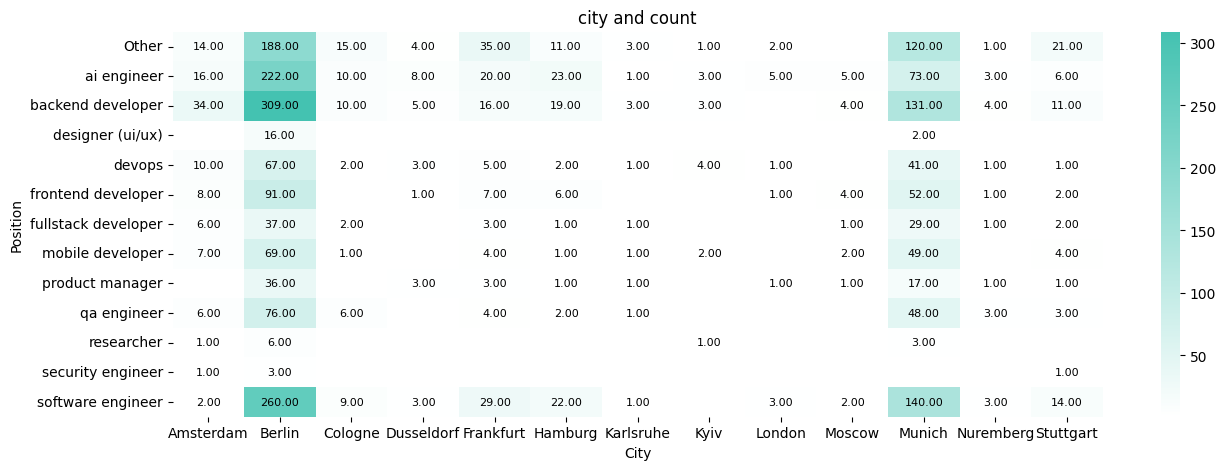

In [18]:
plot_heatmap(df= df_cleaned,x='City',y='Position',title='city and count',value='Salary',x_label='City',y_label='Position',aggfunc='count')

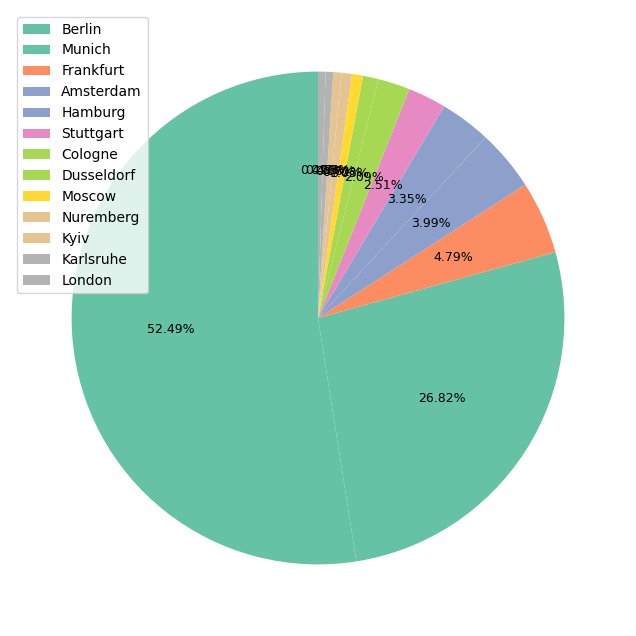

In [46]:
# draw chart to display precentage for each city in the data 
# Top 13 City on the survey
plt.figure(figsize=(8,8))
df_cleaned['City'].value_counts().iloc[:13].plot.pie(autopct="%1.2f%%",fontsize=9,startangle=90,labels=['']*13,cmap='Set2')
plt.ylabel("")
plt.legend(loc='upper left',labels=df_cleaned['City'].value_counts().iloc[:13].index)
plt.show()

#### _`Interpretations:`_
-  `it seems that the most frequent city is Berlin then the cities frequency is ordered as follow Berlin,Munich,Frankfurt,Hamburg,Amsterdam,Stuttgart,Cologne,dusseldrof`
-  `Matched`

In [47]:
######################## POSITION ANALYSIS  #######################

-  `Expectations : The most frequent positions will be Software positions (Front end , backend)  `

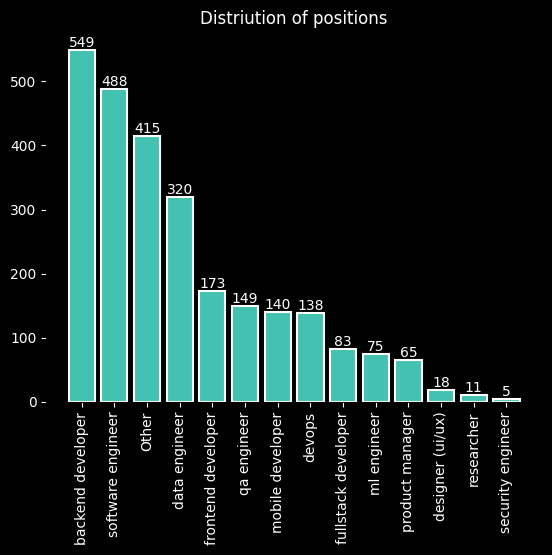

In [48]:
######################################### Draw histogram for positions in the dataset ############################
import matplotlib.pyplot as plt
# create a histogram
# plt.figure(figsize=(40,7))
# sns.countplot(x = 'Position', data = df_cleaned, palette = 'pastel',order=df_cleaned['Position'].value_counts().index)
# plt.title('distribution of Position in the dataset ')
# plt.show()
plot_single_histogram(df_cleaned,'Position','Distriution of positions')

#### _`Interpretations:`_
-  `it seems that the most frequent position is software engineer and backend engineer and data engineer`
-  `Expectations Matched`

In [49]:
# We will select Berlin only 
df_cleaned_Berlin = df_cleaned[df_cleaned['City']== "Berlin"]
value_counts =df_cleaned_Berlin['Position'].value_counts()
mask = df_cleaned_Berlin['Position'].isin(value_counts.index[value_counts < 10])
df_cleaned_Berlin = df_cleaned_Berlin.loc[~mask]

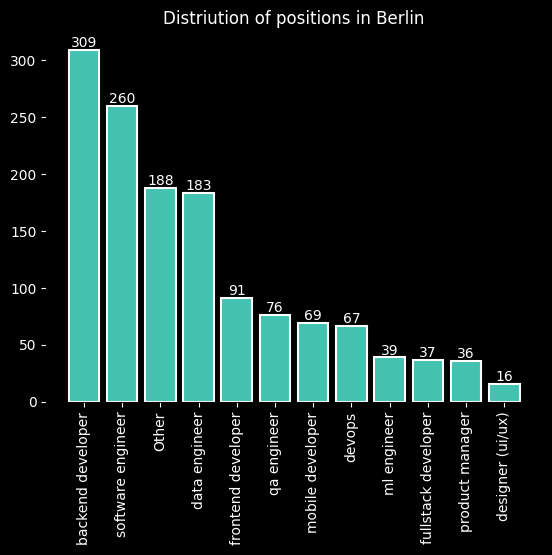

In [50]:
import matplotlib.pyplot as plt
# create a histogram
# plt.figure(figsize=(40,7))
# sns.countplot(x = 'Position', data = df_cleaned_Berlin, palette = 'pastel',order=df_cleaned_Berlin['Position'].value_counts().index)
# plt.title('distribution of Position in the dataset ')
# plt.show()
plot_single_histogram(df_cleaned_Berlin,'Position','Distriution of positions in Berlin')

In [51]:
############################### SENIORITY LEVEL ANALYSIS #################################

In [52]:
# check unique values
df_cleaned_Berlin['Seniority level'].unique()


array(['Senior', 'Lead', 'Junior', 'Middle', 'Head', 'No level', 'VP',
       'CTO', 'Director', 'Key', 'Principal', 'intern', 'C-Level',
       'Working Student'], dtype=object)

In [53]:
# cleaning 
'''
1- principal,lead,head can be mapped to senior 
2- remove senior levels < 5
'''
def clean_senior_col(df,filter = 5):
    df['Seniority level'] =df['Seniority level'].str.lower()
    meaninigless_values = ['nan','no idea, there are no ranges in the firm','no level','no level ']
    df = df[~df['Seniority level'].isin(meaninigless_values)]
    for i, row in df.iterrows():
            if row['Seniority level'] in ['principal','c-level']:
                df.at[i,'Seniority level'] = 'senior'
            if row['Seniority level'] in ['lead','director','cto','vp','key','manager','work center manager','C-level executive manager']:
                df.at[i,'Seniority level'] = 'head'
            if row['Seniority level'] in ['intern','working student','entry level','student']:
                df.at[i,'Seniority level'] = 'junior'
    seniority_counts = df['Seniority level'].value_counts()
    seniority_counts = seniority_counts[seniority_counts >= filter]
    df = df[df['Seniority level'].isin(seniority_counts.index)]
    return df

In [54]:
df_cleaned_Berlin = clean_senior_col(df_cleaned_Berlin)
seniority_remain_values = df_cleaned_Berlin['Seniority level'].value_counts()
seniority_remain_values

Seniority level
senior    790
middle    372
head      151
junior     57
Name: count, dtype: int64

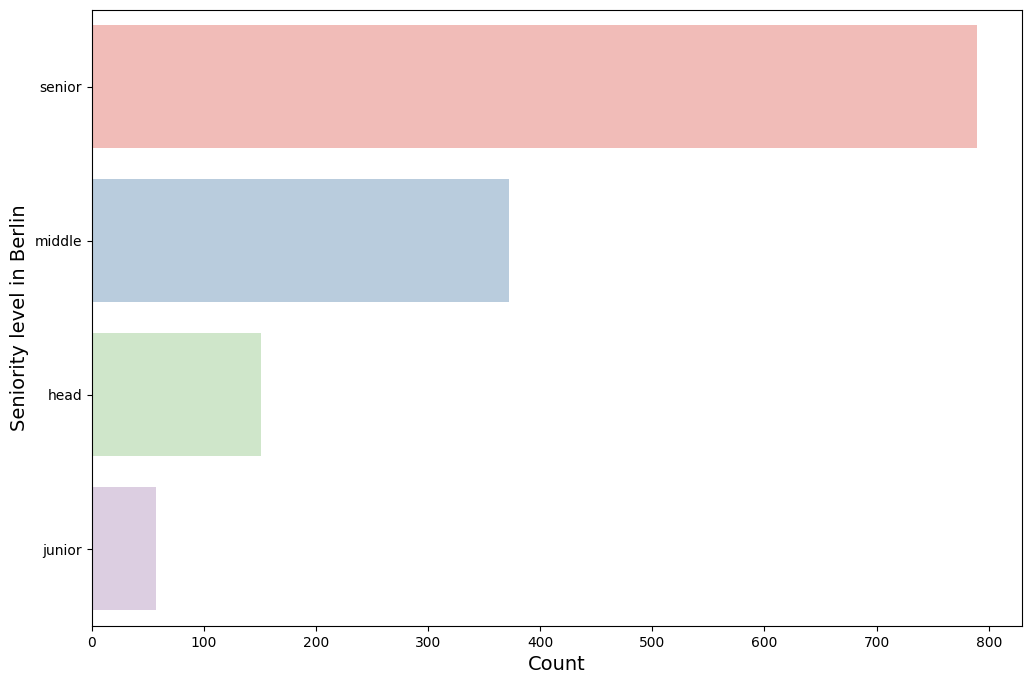

In [55]:
plt.figure(figsize=(12,8))
sns.barplot(y=seniority_remain_values.index,x= seniority_remain_values,palette='Pastel1')
plt.xlabel("Count",fontsize=14)
plt.ylabel("Seniority level in Berlin",fontsize=14)
plt.show()

#### _`Interpretations:`_
-  `From the graph it seems that the most frequent seniority level in the data is senior level , so we can have a strong insights from this level to solve the question and then check other seniority levels so we can support our analysis`

In [56]:
# analysis for seniors only 
df_cleaned_Berlin_senior = df_cleaned_Berlin.copy()
df_cleaned_Berlin_senior = df_cleaned_Berlin_senior[df_cleaned_Berlin_senior['Seniority level'] =='senior']
# remove position count < 7 for better analysis 
position_counts = df_cleaned_Berlin_senior['Position'].value_counts()
position_counts = position_counts[position_counts >= 10]
df_cleaned_Berlin_senior = df_cleaned_Berlin_senior[df_cleaned_Berlin_senior['Position'].isin(position_counts.index)]


In [57]:
############################### SALARY ANALYSIS ##########################################

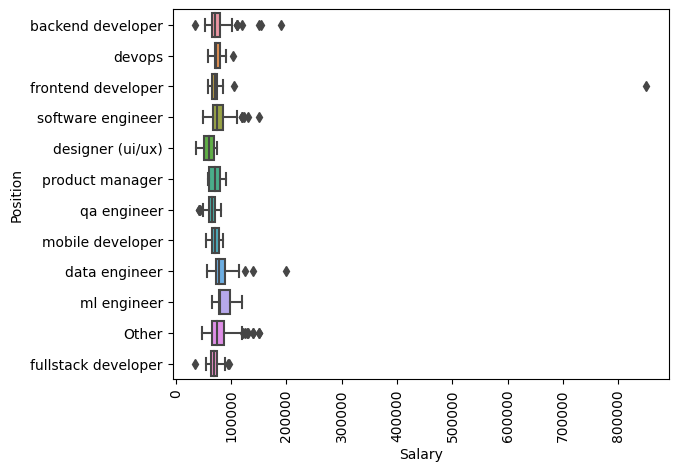

In [58]:
df_cleaned_Berlin_senior['Salary'] = pd.to_numeric(df_cleaned_Berlin_senior['Salary'])
sns.boxplot(x='Salary', y='Position', data=df_cleaned_Berlin_senior)
plt.xticks(rotation=90)
plt.show()

#### _`Interpretations:`_
-  `From this blot box it's obvios that we have outliers in the Salaries , this outliers may affect the mean of the the Salary for each position so i will try to remove them first `

In [59]:
df_cleaned_Berlin_senior = remove_outliers(df_cleaned_Berlin_senior,'Salary')

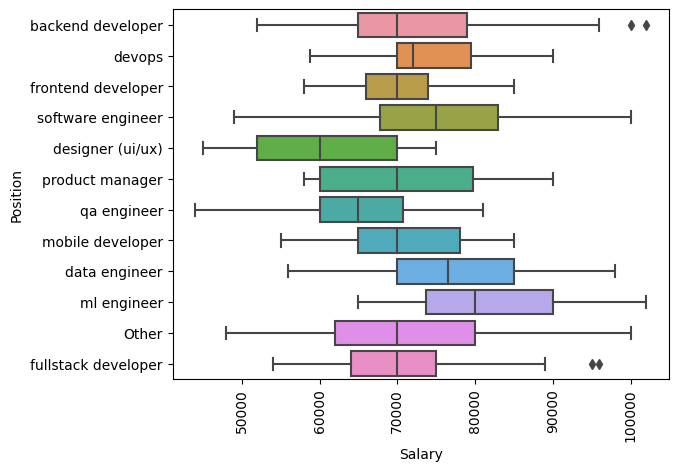

In [60]:
sns.boxplot(x='Salary', y='Position', data=df_cleaned_Berlin_senior)
plt.xticks(rotation=90)
plt.show()

In [61]:
######################## GET AVG SALARIES IN BERLIN  #######################
position_salary = df_cleaned_Berlin_senior.groupby('Position')['Salary'].sum()
position_salary.sort_values(ascending=False,inplace=True)
position_avg_salary = (position_salary/ df_cleaned_Berlin_senior['Position'].value_counts()).sort_values(ascending = False)
top_position = position_avg_salary.index.to_list()
print(position_avg_salary)

Position
ml engineer            81416.666667
data engineer          77313.815789
software engineer      75130.743243
devops                 73510.526316
backend developer      72093.297980
Other                  71535.955056
product manager        71250.000000
frontend developer     70374.693878
mobile developer       69919.512195
fullstack developer    69666.666667
qa engineer            64920.512821
designer (ui/ux)       60933.333333
dtype: float64


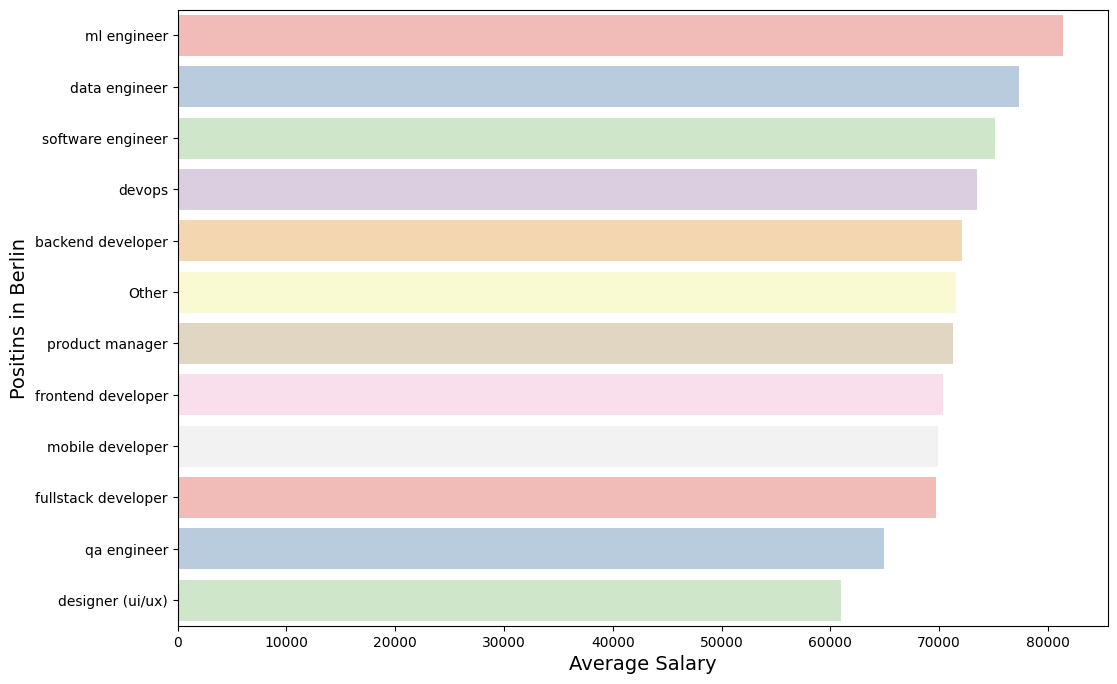

In [62]:
######################## Plot #######################
plt.figure(figsize=(12,8))
sns.barplot(y=top_position,x= position_avg_salary,palette='Pastel1')
plt.xlabel("Average Salary",fontsize=14)
plt.ylabel("Positins in Berlin",fontsize=14)
plt.show()

#### _`Interpretations:`_
1. `From the previous visualizations` I found that the heighst average salary in Berlin is for Five positions 
with this order
Data Engineer          76760.119048
ML Engineer            76395.833333
Product Manager        75116.666667
Software Engineer      74893.030303
DevOps                 73125.714286
--------------------------------------------------
| position | avg_salary |
| -------- | -------- | 
|Data Engineer | 76760.119048 | 
|ML Engineer  | 76395.833333 | 
|Product Manager | 75116.666667 | 
|Software Engineer | 74893.030303 | 
|DevOps | 73125.714286 | 
--------------------------------------------------

2. `Expectation: `
    - high positions in Machine learning engineering (senior) have higher salaries 
3. `Results Interpretation:`
    - From the analysis we find that the highiest Alary go for Data Engineer but with a very small diffrence from the Machine learning engineer so Expectation `Matched`
4. `Additional insights:`
    - Back end and mobile developer are almost the same 
    - Front end and full stack are almost the same 
    - previous Four positions is very close to each other in Salary 
    - QA and Designer are the lowest salaries 



In [63]:
######################################## GET AVG SALARIES IN Berlin with Middle level ##################################


In [64]:
# analysis for middles only 
df_cleaned_middle = df_cleaned_Berlin.copy()
df_cleaned_middle = df_cleaned_middle[df_cleaned_middle['Seniority level'] =='middle']
# remove position count < 7 for better analysis 
position_counts = df_cleaned_middle['Position'].value_counts()
position_counts = position_counts[position_counts >= 5]
df_cleaned_middle = df_cleaned_middle[df_cleaned_middle['Position'].isin(position_counts.index)]

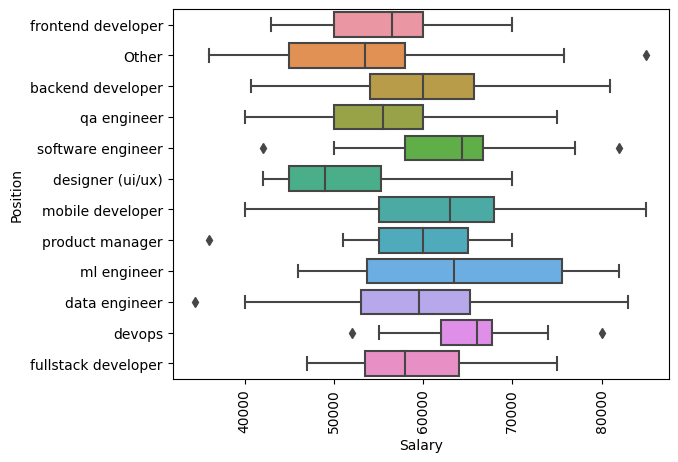

In [65]:
df_cleaned_middle['Salary'] = pd.to_numeric(df_cleaned_middle['Salary'])
df_cleaned_middle = remove_outliers(df_cleaned_middle,'Salary')
sns.boxplot(x='Salary', y='Position', data=df_cleaned_middle)
plt.xticks(rotation=90)
plt.show()

In [66]:
######################## GET AVG SALARIES IN BERLIN  #######################
position_salary = df_cleaned_middle.groupby('Position')['Salary'].sum()
position_salary.sort_values(ascending=False,inplace=True)
position_avg_salary = (position_salary/ df_cleaned_middle['Position'].value_counts()).sort_values(ascending = False)
top_position = position_avg_salary.index.to_list()
print(position_avg_salary)

Position
devops                 65352.222222
ml engineer            64781.250000
software engineer      62988.043478
mobile developer       61714.285714
backend developer      60932.500000
data engineer          59402.433333
fullstack developer    59296.000000
product manager        58826.923077
frontend developer     56646.379310
qa engineer            55372.413793
Other                  53180.555556
designer (ui/ux)       51833.333333
dtype: float64


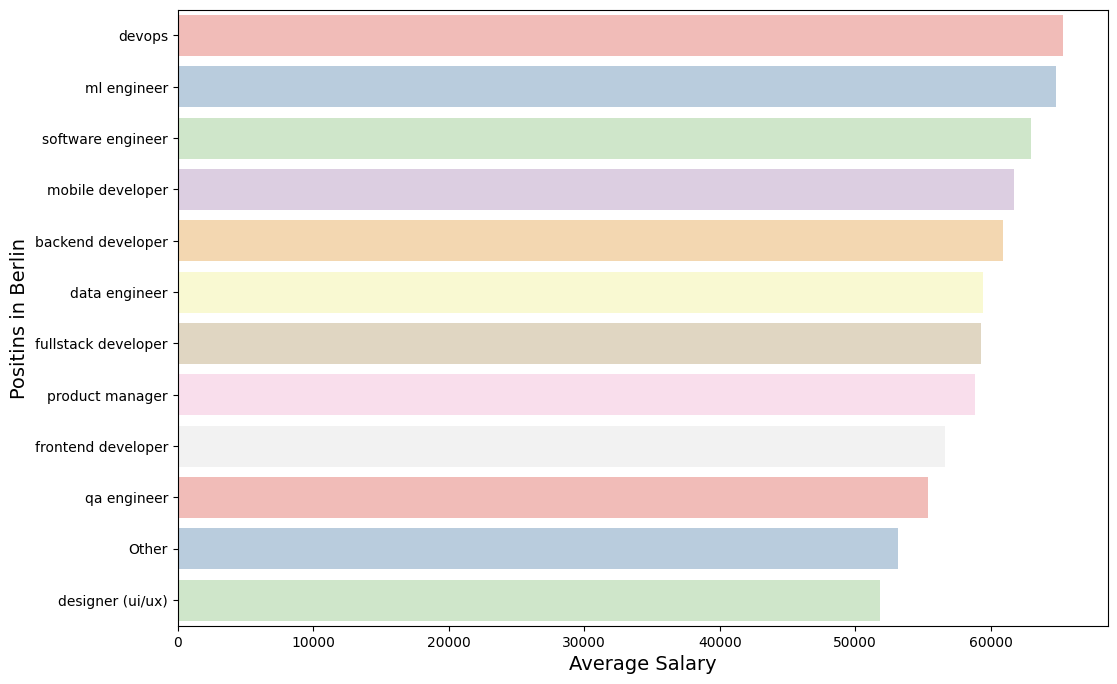

In [67]:
######################## Plot #######################
plt.figure(figsize=(12,8))
sns.barplot(y=top_position,x= position_avg_salary,palette='Pastel1')
plt.xlabel("Average Salary",fontsize=14)
plt.ylabel("Positins in Berlin",fontsize=14)
plt.show()

#### _`Interpretations:`_
1. `From the previous visualizations` I found that the heighst average salary in Berlin for MIDDLE position is for Five positions 
with this order
DevOps                 65165.263158
Software Engineer      62871.568627
Mobile Developer       62857.142857
ML Engineer            62092.592593
Backend Developer      60669.879518
--------------------------------------------------
| position | avg_salary |
| -------- | -------- | 
|DevOps             |    65165.263158|
|Software Engineer  |    62871.568627|
|Mobile Developer   |    62857.142857|
|ML Engineer        |    62092.592593|
|Backend Developer  |    60669.879518|
--------------------------------------------------

2. `Expectation: `
    - high positions in Machine learning engineering (middle) have higher salaries 
3. `Results Interpretation:`
    - From the analysis we find that the ML Engineer is in the Top 5 and is too close to the top value so the Expectation in `Matched`
4. `Additional insights:`
    - For middle top position Software Engineer,and backend developer start to appear this support the fact that these position appear alot in lower seniority level as they didn't need experience as much as ML learning or Product Manager
    - QA and Designer are the lowest salaries as senoir level 

In [68]:
# analysis for seniors only 
df_cleaned_Berlin_junior = df_cleaned_Berlin.copy()
df_cleaned_Berlin_junior = df_cleaned_Berlin_junior[df_cleaned_Berlin_junior['Seniority level'] =='junior']
# remove position count < 7 for better analysis 
position_counts = df_cleaned_Berlin_junior['Position'].value_counts()
position_counts = position_counts[position_counts >= 5]
df_cleaned_Berlin_junior = df_cleaned_Berlin_junior[df_cleaned_Berlin_junior['Position'].isin(position_counts.index)]

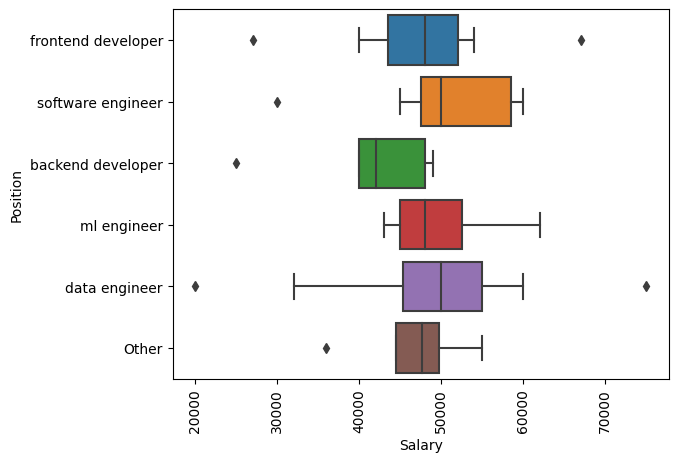

In [69]:
df_cleaned_Berlin_junior['Salary'] = pd.to_numeric(df_cleaned_Berlin_junior['Salary'])
df_cleaned_Berlin_junior = remove_outliers(df_cleaned_Berlin_junior,'Salary')
sns.boxplot(x='Salary', y='Position', data=df_cleaned_Berlin_junior)
plt.xticks(rotation=90)
plt.show()

In [70]:
######################## GET AVG SALARIES IN BERLIN  #######################
position_salary = df_cleaned_Berlin_junior.groupby('Position')['Salary'].sum()
position_salary.sort_values(ascending=False,inplace=True)
position_avg_salary = (position_salary/ df_cleaned_Berlin_junior['Position'].value_counts()).sort_values(ascending = False)
top_position = position_avg_salary.index.to_list()
print(position_avg_salary)

Position
software engineer     50285.714286
ml engineer           50100.000000
data engineer         48926.315789
frontend developer    47571.428571
Other                 46562.500000
backend developer     40800.000000
dtype: float64


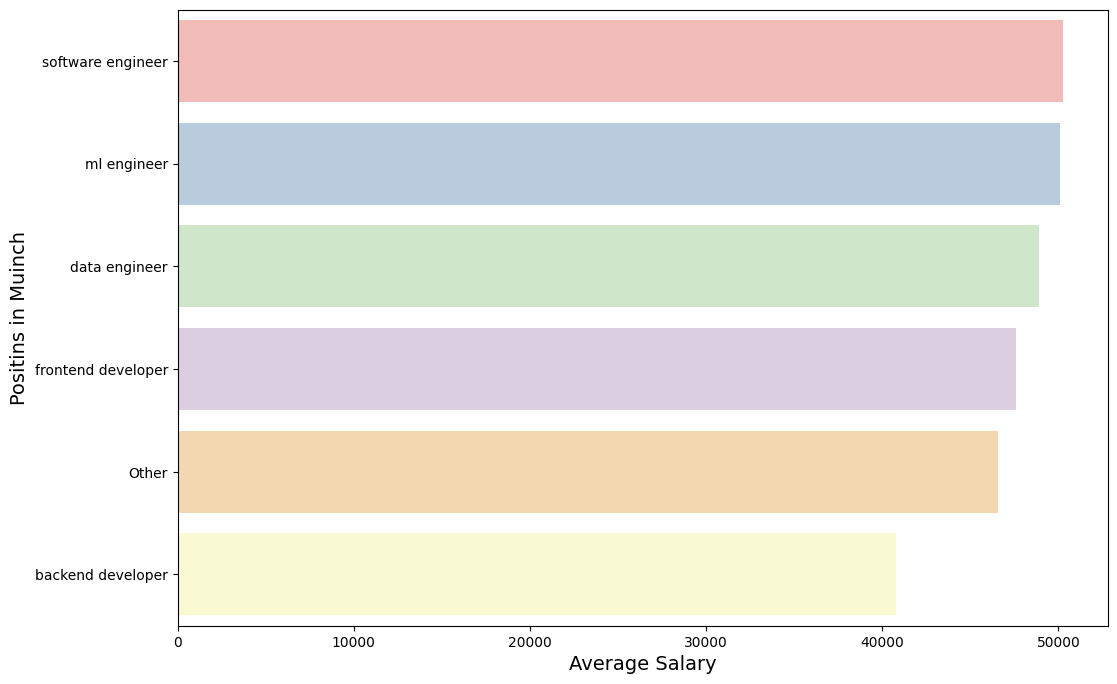

In [71]:
######################## Plot #######################
plt.figure(figsize=(12,8))
sns.barplot(y=top_position,x= position_avg_salary,palette='Pastel1')
plt.xlabel("Average Salary",fontsize=14)
plt.ylabel("Positins in Muinch",fontsize=14)
plt.show()

#### _`Interpretations:`_
1. `From the previous visualizations` I found that the heighst average salary in Berlin FOR Junior POSITIONS is for three positions 
with this order
--------------------------------------------------
| position | avg_salary |
| -------- | -------- | 
| Software Engineer   |  50285.714286|
| ML Engineer         |  50100.000000|
--------------------------------------------------

2. `Expectation:`
    - 

In [72]:
# may make spacific analysis for the devops 

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> Interpret Results</h1></div>

#### `Done during analysis `
#### `Question's Answer :` Machine Learning Engineer